In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

import tensorflow as tf
from keras import models
from keras import layers

import math
from sklearn.model_selection import train_test_split, StratifiedKFold
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, Lambda, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline
keras.backend.set_image_data_format('channels_last')

In [35]:
df = pd.read_csv("credit_preprocessed.csv")

In [36]:
df.shape
df = df.drop('ID', axis=1)

# RandomForest - n_estimators

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def load_data_kfold(k):
    
    train = df
    
    X_train = np.array(df.drop('Class', axis=1).values)
    
    y_train = np.array(train["Class"].values)
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train


RForest_Acertos_Total = np.asarray([])
RForest_Falhas_Total = np.asarray([])

for x in range(5, 400, 30):
    print("\n\nCom %d estimators:\n" % (x))
    
    RForest_Falhas_Media = 0
    RForest_Acertos_Media = 0

    X = np.array(df.drop('Class', axis=1).values)
    y = np.array(df.Class.values)

    rf = RandomForestClassifier(n_estimators = x)

    k = 2
    folds, X_train, y_train = load_data_kfold(k)


    for j, (train_idx, val_idx) in enumerate(folds):

        print('\nFold ',j)
        X_train_cv = X_train[train_idx]
        y_train_cv = y_train[train_idx]
        X_valid_cv = X_train[val_idx]
        y_valid_cv = y_train[val_idx]

        rf.fit(X_train_cv,
               y_train_cv) 

        Test = rf.predict(X_valid_cv)
        Real = y_valid_cv

        RForest_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
        RForest_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

        RForest_Falhas_Media = (RForest_Falhas_Media + RForest_Falhas)
        RForest_Acertos_Media = (RForest_Acertos_Media + RForest_Acertos)

        print("Resultado: %s falharam e %s acertaram" % (RForest_Falhas, RForest_Acertos))

    RForest_Falhas_Media = RForest_Falhas_Media/k
    RForest_Acertos_Media = RForest_Acertos_Media/k

    print("\nResultado Final (Média dos %s folds): %.2f falharam e %.2f acertaram" % (k, RForest_Falhas_Media, RForest_Acertos_Media))
    RForest_Acertos_Total = np.append(RForest_Acertos_Total, RForest_Acertos_Media)
    RForest_Falhas_Total = np.append(RForest_Falhas_Total, RForest_Falhas_Media)



Com 5 estimators:


Fold  0
Resultado: 21.38 falharam e 78.62 acertaram

Fold  1
Resultado: 22.17 falharam e 77.83 acertaram

Resultado Final (Média dos 2 folds): 21.77 falharam e 78.22 acertaram


Com 35 estimators:


Fold  0
Resultado: 18.66 falharam e 81.34 acertaram

Fold  1
Resultado: 18.87 falharam e 81.13 acertaram

Resultado Final (Média dos 2 folds): 18.77 falharam e 81.23 acertaram


Com 65 estimators:


Fold  0
Resultado: 18.69 falharam e 81.31 acertaram

Fold  1
Resultado: 18.59 falharam e 81.41 acertaram

Resultado Final (Média dos 2 folds): 18.64 falharam e 81.36 acertaram


Com 95 estimators:


Fold  0
Resultado: 18.57 falharam e 81.43 acertaram

Fold  1
Resultado: 18.76 falharam e 81.24 acertaram

Resultado Final (Média dos 2 folds): 18.66 falharam e 81.34 acertaram


Com 125 estimators:


Fold  0
Resultado: 18.64 falharam e 81.36 acertaram

Fold  1
Resultado: 18.78 falharam e 81.22 acertaram

Resultado Final (Média dos 2 folds): 18.71 falharam e 81.29 acertaram


Com

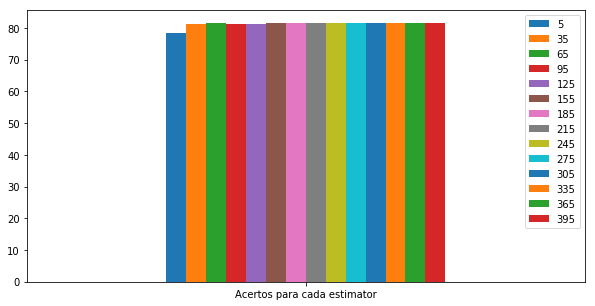

In [46]:
data = {'5':RForest_Acertos_Total[0],
        '35':RForest_Acertos_Total[1],
        '65':RForest_Acertos_Total[2],
        '95':RForest_Acertos_Total[3],
        '125':RForest_Acertos_Total[4],
        '155':RForest_Acertos_Total[5],
        '185':RForest_Acertos_Total[6],
        '215':RForest_Acertos_Total[7],
        '245':RForest_Acertos_Total[8],
        '275':RForest_Acertos_Total[9],
        '305':RForest_Acertos_Total[10],
        '335':RForest_Acertos_Total[11],
        '365':RForest_Acertos_Total[12],
        '395':RForest_Acertos_Total[13]}

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Acertos para cada estimator']) 

ax = dfResultados.plot.bar(rot=0)

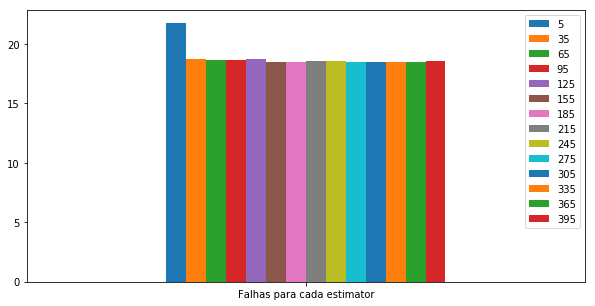

In [47]:
data = {'5':RForest_Falhas_Total[0],
        '35':RForest_Falhas_Total[1],
        '65':RForest_Falhas_Total[2],
        '95':RForest_Falhas_Total[3],
        '125':RForest_Falhas_Total[4],
        '155':RForest_Falhas_Total[5],
        '185':RForest_Falhas_Total[6],
        '215':RForest_Falhas_Total[7],
        '245':RForest_Falhas_Total[8],
        '275':RForest_Falhas_Total[9],
        '305':RForest_Falhas_Total[10],
        '335':RForest_Falhas_Total[11],
        '365':RForest_Falhas_Total[12],
        '395':RForest_Falhas_Total[13]}

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Falhas para cada estimator']) 

ax = dfResultados.plot.bar(rot=0)

# RandomForest - max_leaf_nodes

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def load_data_kfold(k):
    
    train = df
    
    X_train = np.array(df.drop('Class', axis=1).values)
    
    y_train = np.array(train["Class"].values)
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train


RForest_Acertos_Total = np.asarray([])
RForest_Falhas_Total = np.asarray([])

for x in range(5, 400, 30):
    print("\n\nCom no máximo %d leafs :\n" % (x))
    
    RForest_Falhas_Media = 0
    RForest_Acertos_Media = 0

    X = np.array(df.drop('Class', axis=1).values)
    y = np.array(df.Class.values)

    rf = RandomForestClassifier(n_estimators = 200, max_leaf_nodes= x)

    k = 2
    folds, X_train, y_train = load_data_kfold(k)


    for j, (train_idx, val_idx) in enumerate(folds):

        print('\nFold ',j)
        X_train_cv = X_train[train_idx]
        y_train_cv = y_train[train_idx]
        X_valid_cv = X_train[val_idx]
        y_valid_cv = y_train[val_idx]

        rf.fit(X_train_cv,
               y_train_cv) 

        Test = rf.predict(X_valid_cv)
        Real = y_valid_cv

        RForest_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
        RForest_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

        RForest_Falhas_Media = (RForest_Falhas_Media + RForest_Falhas)
        RForest_Acertos_Media = (RForest_Acertos_Media + RForest_Acertos)

        print("Resultado: %s falharam e %s acertaram" % (RForest_Falhas, RForest_Acertos))

    RForest_Falhas_Media = RForest_Falhas_Media/k
    RForest_Acertos_Media = RForest_Acertos_Media/k

    print("\nResultado Final (Média dos %s folds): %.2f falharam e %.2f acertaram" % (k, RForest_Falhas_Media, RForest_Acertos_Media))
    RForest_Acertos_Total = np.append(RForest_Acertos_Total, RForest_Acertos_Media)
    RForest_Falhas_Total = np.append(RForest_Falhas_Total, RForest_Falhas_Media)



Com no máximo 5 leafs :


Fold  0
Resultado: 20.63 falharam e 79.37 acertaram

Fold  1
Resultado: 20.67 falharam e 79.33 acertaram

Resultado Final (Média dos 2 folds): 20.65 falharam e 79.35 acertaram


Com no máximo 35 leafs :


Fold  0
Resultado: 19.03 falharam e 80.97 acertaram

Fold  1
Resultado: 18.45 falharam e 81.55 acertaram

Resultado Final (Média dos 2 folds): 18.74 falharam e 81.26 acertaram


Com no máximo 65 leafs :


Fold  0
Resultado: 18.7 falharam e 81.3 acertaram

Fold  1
Resultado: 18.31 falharam e 81.69 acertaram

Resultado Final (Média dos 2 folds): 18.50 falharam e 81.50 acertaram


Com no máximo 95 leafs :


Fold  0
Resultado: 18.76 falharam e 81.24 acertaram

Fold  1
Resultado: 18.5 falharam e 81.5 acertaram

Resultado Final (Média dos 2 folds): 18.63 falharam e 81.37 acertaram


Com no máximo 125 leafs :


Fold  0
Resultado: 18.42 falharam e 81.58 acertaram

Fold  1
Resultado: 18.45 falharam e 81.55 acertaram

Resultado Final (Média dos 2 folds): 18.44 falhar

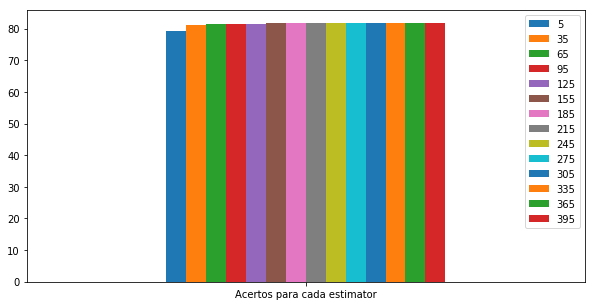

In [52]:
data = {'5':RForest_Acertos_Total[0],
        '35':RForest_Acertos_Total[1],
        '65':RForest_Acertos_Total[2],
        '95':RForest_Acertos_Total[3],
        '125':RForest_Acertos_Total[4],
        '155':RForest_Acertos_Total[5],
        '185':RForest_Acertos_Total[6],
        '215':RForest_Acertos_Total[7],
        '245':RForest_Acertos_Total[8],
        '275':RForest_Acertos_Total[9],
        '305':RForest_Acertos_Total[10],
        '335':RForest_Acertos_Total[11],
        '365':RForest_Acertos_Total[12],
        '395':RForest_Acertos_Total[13]}

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Acertos para cada valor máximo de folhas']) 

ax = dfResultados.plot.bar(rot=0)

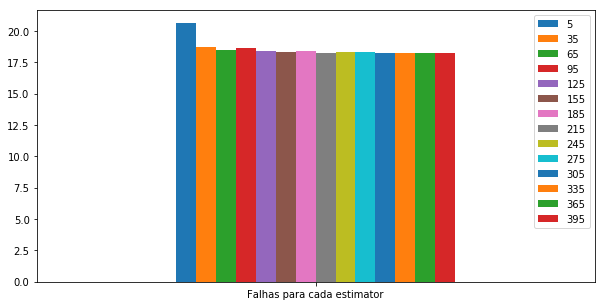

In [53]:
data = {'5':RForest_Falhas_Total[0],
        '35':RForest_Falhas_Total[1],
        '65':RForest_Falhas_Total[2],
        '95':RForest_Falhas_Total[3],
        '125':RForest_Falhas_Total[4],
        '155':RForest_Falhas_Total[5],
        '185':RForest_Falhas_Total[6],
        '215':RForest_Falhas_Total[7],
        '245':RForest_Falhas_Total[8],
        '275':RForest_Falhas_Total[9],
        '305':RForest_Falhas_Total[10],
        '335':RForest_Falhas_Total[11],
        '365':RForest_Falhas_Total[12],
        '395':RForest_Falhas_Total[13]}

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['Falhas para cada valor máximo de folhas']) 

ax = dfResultados.plot.bar(rot=0)